## Linear Regression
We are now leaving the world of unsupervised machine learning and commencing the study of supervised machine learning. 
Let us precisely define the difference between these two areas.

When we used the unsupervised machine learning algorithms in the previous sections, we gave the algorithm the entirety of our data (survey questions, customer data points, etc.) and asked it to identify patterns (principal components, clusters, etc.) hidden within that data.

In supervised machine learning, our data is no longer treated as a unified whole, but is broken into *output* data that we wish to predict and *input* data that we use to compute our predictions. For example, we might wish to predict
the average amount that a customer will spend on our products based on their age and income. In this case, our *output* data would be the customer's spending amount, and the *input* data would be customer's age and income. 
**The task of our supervised machine learning methods is to approximate (*learn*) the mathematical function that maps input data to output data.**

There are two major consequences of the above definition: 

1. We will use a different machine learning method depending on the form of the function that we wish for the computer to learn.
2. We will assess the quality of our machine learning model of the true function based on comparisons between real output data and the predicted output data from our model.

### Building Models with Linear Regression

Since we will learn machine learning methods for approximating different types of functions, we will start out 
by learning a very simple functional form: the line *y = mx + b*. If two variables in our data (input and output) have an approximately linear relationship, then the **Linear Regression** statistical method can be used to construct a model that can predict the output from the input. 

Let us consider the relationship between the *height* and *weight* of a given person. We expect that height and weight will be correlated - taller people generally (though not always) weigh more than shorter people. We begin with a list of heights and weights of ten (fictitious) people:

In [1]:
import numpy as np

heights_in_cm = np.array([182, 150, 197, 164, 171, 155, 187, 148, 162, 168]).reshape(-1, 1)
weights_in_kg = np.array([81, 55, 90, 60, 65, 57, 86, 52, 61, 62])

Before attempting to construct a model for this data, we should visualize it and form a qualitative understanding of its form. This will allow us to choose the right machine learning tool for our problem:

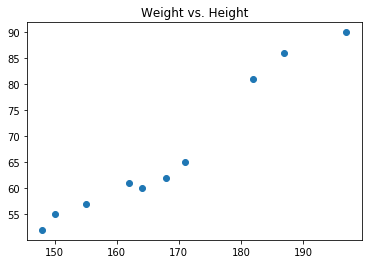

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(heights_in_cm, weights_in_kg)
plt.title('Weight vs. Height')
plt.show()

The data looks roughly linear, so a linear regression should yield an accurate model. We will now perform linear regression using a function from the `sklearn` module. This will give us a linear model of our data:

In [3]:
from sklearn import linear_model;
linear = linear_model.LinearRegression()
linear.fit(heights_in_cm, weights_in_kg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Notice the similarity between this code and the other machine learning methods that we have used so far. The core code is usually two lines:

1. Construct a model object
2. Train the model on our data

The model object `linear` now contains the linear model constructed from our data. We can see the equation for this line using the code below:

In [4]:
print("Linear model: y = {}x + {}".format(linear.coef_, linear.intercept_))

Linear model: y = [0.82045609]x + -71.26480599046968


The core purpose of supervised machine learning models is to *predict* things. We have now trained our linear model to predict weight from height. Let's actually have it perform the prediction by giving it a set of heights and looking at the corresponding weights that it predicts:

In [5]:
predicted_weights_in_kg = linear.predict(heights_in_cm)
print("predicted:")
print(predicted_weights_in_kg)
print("actual:")
print(weights_in_kg)

predicted:
[78.05820286 51.8036079  90.36504425 63.28999319 69.03318584 55.90588836
 82.16048332 50.16269571 61.64908101 66.57181756]
actual:
[81 55 90 60 65 57 86 52 61 62]


We can see that the predictions are fairly close to the actual values. We can now graph these predicted values as a line to see how well this linear model fits our data: 

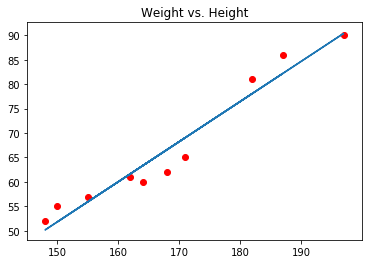

In [6]:
plt.plot(heights_in_cm, predicted_weights_in_kg)
plt.scatter(heights_in_cm, weights_in_kg, c="r")
plt.title('Weight vs. Height')
plt.show()

Qualitatively, we can see that our line is a "good fit" for our data. We can make a more quantitative assessment of the quality of our model by computing the [R squared](https://en.wikipedia.org/wiki/Coefficient_of_determination) value, a standard measure of the quality of a linear model:

In [7]:
r2 = linear.score(heights_in_cm, weights_in_kg)
print("R2: ", r2)

R2:  0.9480301569484364


<span style="color:blue;font-weight:bold">Exercise</span>: Predicting Monthly Spending. 
Consider the below customer dataset containing average monthly spending on our product vs. customer annual incomes:

In [8]:
customer_annual_income_usd = np.array([30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]).reshape(-1,1)
avg_monthly_spending_usd = np.array([100, 130, 150, 190, 240, 270, 290, 330])

Perform the following actions:

1. Perform a linear regression on this dataset, using `customer_annual_income_usd` as your $x$ variable and `avg_monthly_spending_usd` as your $y$ variable - store your model object in the variable `my_linear_model` 
2. Plot the raw data using `plt.scatter` - color the points blue.
3. Plot the predicted values as a line using `plt.plot` - color this line red. 
4. Compute the R-squared value for your linear model and store it in a variable called `r_squared`. 

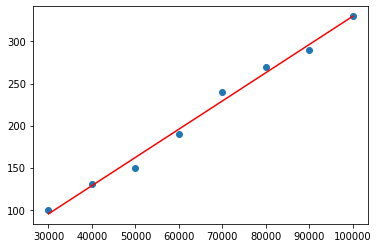

In [16]:
my_linear_model = linear_model.LinearRegression()
my_linear_model.fit(customer_annual_income_usd, avg_monthly_spending_usd)

plt.scatter(customer_annual_income_usd, avg_monthly_spending_usd)
plt.plot(customer_annual_income_usd, my_linear_model.predict(customer_annual_income_usd), c="r")

r_squared = my_linear_model.score(customer_annual_income_usd, avg_monthly_spending_usd)

In [16]:
import math
check_variable_definition("my_linear_model")
linear_model_hint = "Your variable <code>my_linear_model</code> does not contain the appropriate value."
assert isinstance(my_linear_model, linear_model.LinearRegression), linear_model_hint
assert hasattr(my_linear_model, 'coef_'), linear_model_hint
assert math.isclose(my_linear_model.coef_[0], 0.00335714, abs_tol=1e-3), linear_model_hint
assert math.isclose(r_squared, 0.991, abs_tol=1e-3), "Double-check your computation of <code>r_squared</code> - hint: you should use <code>linear.score</code>"
success()

In [17]:
r_squared

0.9913238593866867

In [19]:
my_linear_model.intercept_, my_linear_model.coef_.tolist()

(-5.714285714285694, [0.0033571428571428567])